In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from scipy.io import wavfile
import sys
import time
import math

In [174]:
%cd python

[WinError 2] The system cannot find the file specified: 'python'
C:\Users\Batman\Desktop\q-bats\bat_recognition_task\python


In [3]:
data_path = "../experiments/test/test/MOTU"

In [4]:
data = np.hstack([np.load(data_path+'/audio_0.npy'),np.load(data_path+'/audio_1.npy'),np.load(data_path+'/audio_2.npy')])
data = data.T

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/test/test/MOTU/audio_1.npy'

In [13]:
data = np.load(data_path+'/audio_0.npy')

In [7]:
data.shape

(4, 441000)

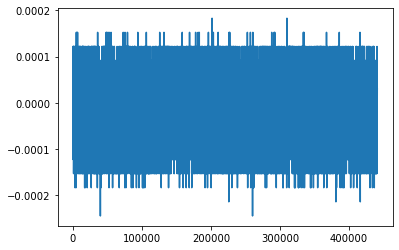

In [20]:
plt.plot(data[2,:])

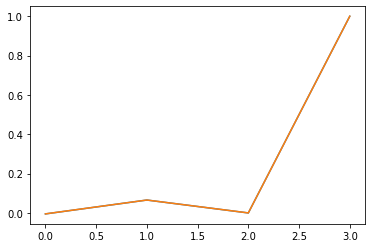

KeyboardInterrupt: 

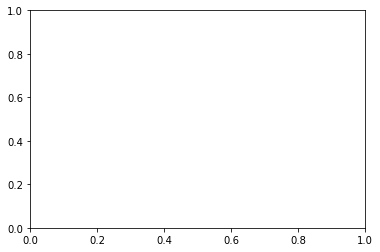

In [6]:
plt.plot(data[:,1]/np.max(data[:,1]))
plt.plot(data[:,0]/np.max(data[:,0]))
plt.show()
plt.plot(data)

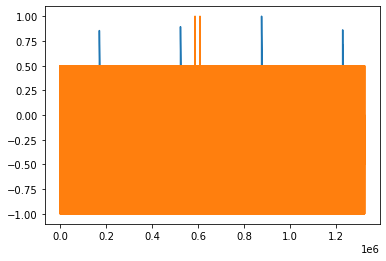

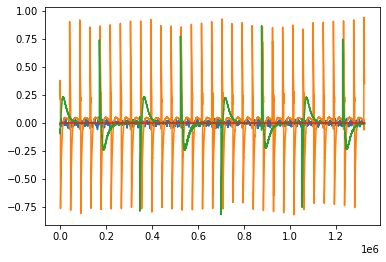

In [211]:
plt.plot(data[:,2]/np.max(data[:,2]))
plt.plot(data[:,3]/np.max(data[:,3]))
plt.show()
plt.plot(data)

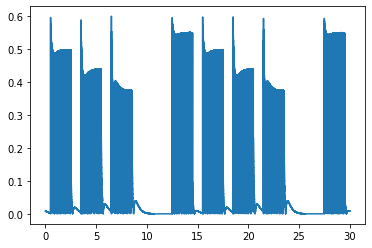

In [228]:
plt.plot(np.arange(len(data[:,2]))/192000, np.abs(data[:,2]))

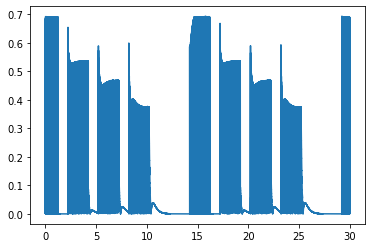

In [231]:
plt.plot(np.arange(len(data[:,2]))/192000, np.abs(data[:,2]))

In [183]:
import soundcard as sc

In [184]:
sc.all_microphones()

[<Microphone MOTU Analog 5-6 (MOTU Audio Wave for 64 bit) (2 channels)>,
 <Microphone MOTU Analog 3-4 (MOTU Audio Wave for 64 bit) (2 channels)>,
 <Microphone MOTU Analog 1-2 (MOTU Audio Wave for 64 bit) (2 channels)>,
 <Microphone MOTU Return 1-2 (MOTU Audio Wave for 64 bit) (2 channels)>,
 <Microphone MOTU Analog 7-8 (MOTU Audio Wave for 64 bit) (2 channels)>]

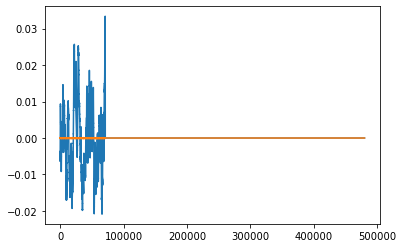

In [185]:
mic = sc.get_microphone('1-2')
plt.plot(mic.record(480000, samplerate=48000, blocksize=1024))

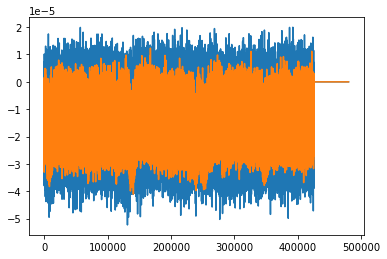

In [182]:
plt.plot(sc.get_microphone('3-4').record(numframes=480000, samplerate=48000))

In [148]:
CHUNK = RATE*10
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 20
WAVE_OUTPUT_FILENAME = "output.wav"

In [150]:
round(RATE / CHUNK * RECORD_SECONDS)

2

In [151]:
p = pyaudio.PyAudio()
stream_1_2 = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                input_device_index=4,
                frames_per_buffer=CHUNK)
stream_3_4 = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                input_device_index=3,
                frames_per_buffer=CHUNK)

print("* recording")

frames_1_2 = []
frames_3_4 = []

s = time.time()
for i in range(0, round(RATE / CHUNK * RECORD_SECONDS)):
    data = stream_1_2.read(CHUNK)
    frames_1_2.append(data)
    print(time.time() - s)
    data = stream_3_4.read(CHUNK)
    frames_3_4.append(data)
    print(time.time() - s)
    time.sleep(5)

print("* done recording")

stream_1_2.stop_stream()
stream_1_2.close()
stream_3_4.stop_stream()
stream_3_4.close()
p.terminate()

* recording
9.97632384300232
9.999262571334839
19.98655867576599
19.999523639678955
* done recording


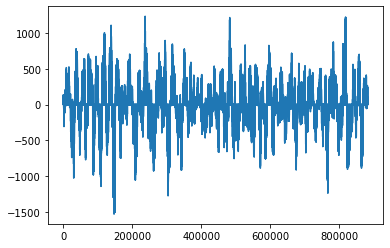

In [156]:
plt.plot(np.frombuffer(frames_1_2[1], np.int16))

In [133]:
data_1_2 = np.frombuffer(frames_1_2[0], np.int16)
data_1_2 = np.reshape(data_1_2, (-1,2))
data_1 = data_1_2[:,0]
data_2 = data_1_2[:,1]

In [138]:
data_3_4 = np.frombuffer(frames_3_4[0], np.int16)
data_3_4 = np.reshape(data_3_4, (-1,2))
data_3 = data_3_4[:,0]
data_4 = data_3_4[:,1]

In [142]:
data_4

array([ 0, -1,  0, ..., -1,  0, -1], dtype=int16)

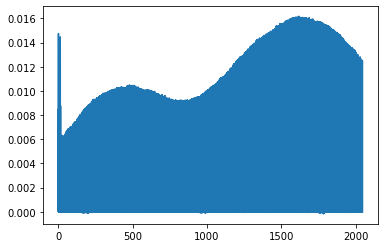

In [71]:
plt.plot(np.frombuffer(frames[0], np.float32))

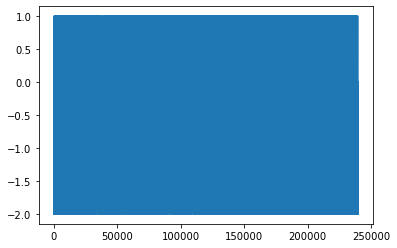

In [31]:
plt.plot(np.array(d[1], dtype=np.float32))

In [32]:
d

(48000, array([ 0,  0, -1, ...,  0,  0, -1], dtype=int16))

In [54]:
p.get_default_input_device_info()

{'index': 1,
 'structVersion': 2,
 'name': 'MOTU Analog 7-8 (MOTU Audio Wav',
 'hostApi': 0,
 'maxInputChannels': 2,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [60]:
p.get_device_info_by_index(4)

{'index': 4,
 'structVersion': 2,
 'name': 'MOTU Analog 1-2 (MOTU Audio Wav',
 'hostApi': 0,
 'maxInputChannels': 2,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

FileNotFoundError: [Errno 2] No such file or directory: '-f'